#Load Data

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit


In [92]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [94]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [95]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [96]:
df.isnull().sum() / df.shape[0] * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [97]:
df[['agent', 'company']] = df[['agent', 'company']].fillna(0)
df['children'] = df['children'].fillna(df['children'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [98]:
df.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [99]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
             'July', 'August', 'September', 'October', 'November', 'December']

In [100]:
df['arrival_date_year'] = df['arrival_date_year'].astype(int)

In [101]:
monthly_booking = df.groupby(['arrival_date_year','arrival_date_month', 'hotel']).size().reset_index(name='num_bookings')

In [102]:
monthly_booking['month_num'] = monthly_booking['arrival_date_month'].map(lambda x: month_order.index(x) + 1)

In [103]:
le = LabelEncoder()
train_mask = monthly_booking['arrival_date_year'] < 2018
le.fit(monthly_booking[train_mask]['hotel'])
monthly_booking['hotel_encoded'] = le.transform(monthly_booking['hotel'])

In [104]:
total_guests = df.groupby(['arrival_date_year', 'arrival_date_month', 'hotel'])[['adults', 'children', 'babies']].sum().reset_index()
total_guests['month_num'] = total_guests['arrival_date_month'].map(lambda x: month_order.index(x) + 1)
total_guests['total_guests'] = total_guests[['adults', 'children', 'babies']].sum(axis=1)
total_guests = total_guests[['arrival_date_year', 'month_num', 'hotel', 'total_guests']]
monthly_booking = monthly_booking.merge(total_guests, on=['arrival_date_year', 'month_num', 'hotel'], how='left')

In [105]:
cancel_rate = df.groupby(['arrival_date_year', 'arrival_date_month', 'hotel'])['is_canceled'].mean().reset_index()
cancel_rate.rename(columns={'is_canceled': 'cancellation_rate'}, inplace=True)
cancel_rate['month_num'] = cancel_rate['arrival_date_month'].map(lambda x: month_order.index(x) + 1)
monthly_booking = monthly_booking.merge(cancel_rate[['arrival_date_year', 'month_num', 'hotel', 'cancellation_rate']], on=['arrival_date_year', 'month_num', 'hotel'], how='left')

In [106]:
monthly_booking = monthly_booking.sort_values(by=['hotel_encoded', 'month_num', 'arrival_date_year']).reset_index(drop=True)
monthly_booking['previous_year_bookings'] = monthly_booking.groupby(['month_num', 'hotel_encoded'])['num_bookings'].shift(1)

In [107]:
monthly_booking.dropna(inplace=True)


##Train-test split (train on 2015-2016, test on 2017)
time-based split

In [108]:
x = monthly_booking[['hotel_encoded', 'previous_year_bookings', 
                     'total_guests', 'cancellation_rate']]
y = monthly_booking['num_bookings']

In [109]:
x_train = x[(monthly_booking['arrival_date_year'] >= 2015) & (monthly_booking['arrival_date_year'] <= 2016)]
y_train = y[(monthly_booking['arrival_date_year'] >= 2015) & (monthly_booking['arrival_date_year'] <= 2016)]

x_test = x[monthly_booking['arrival_date_year'] == 2017]
y_test = y[monthly_booking['arrival_date_year'] == 2017]

In [110]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5,10,None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 0.8]
}

In [111]:
tscv = TimeSeriesSplit(n_splits=3)

In [112]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=tscv,scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

In [113]:
grid_search.fit(x_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found:  {'max_depth': 5, 'max_features': 0.8, 'min_samples_split': 2, 'n_estimators': 200}


In [114]:
model = grid_search.best_estimator_

In [115]:
pred_test = model.predict(x_test)
print(f"MAE on 2017 test data: {mean_absolute_error(y_test, pred_test)}")
print(f"R2 score on 2017 test data: {r2_score(y_test, pred_test)}")
print(f"MSE on 2017 test data: {mean_squared_error(y_test, pred_test)}")
rmse = np.sqrt(mean_squared_error(y_test, pred_test))
print(f"RMSE on 2017 test data: {rmse}")

MAE on 2017 test data: 135.9834375
R2 score on 2017 test data: 0.959571607349352
MSE on 2017 test data: 42305.65711093751
RMSE on 2017 test data: 205.68339045955437


In [116]:
print("Test Set: Actual vs Predicted Bookings")
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test})
print(comparison.head())


Test Set: Actual vs Predicted Bookings
   Actual  Predicted
1    2372   2404.935
3    2594   2707.425
5    3412   3561.560
7    3919   3947.810
9    4556   3947.810


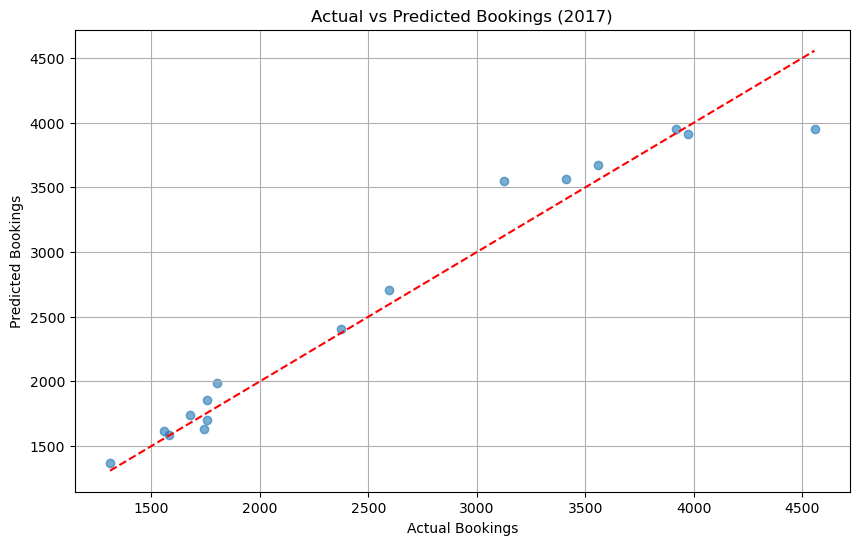

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Bookings")
plt.ylabel("Predicted Bookings")
plt.title("Actual vs Predicted Bookings (2017)")
plt.grid(True)
plt.show()

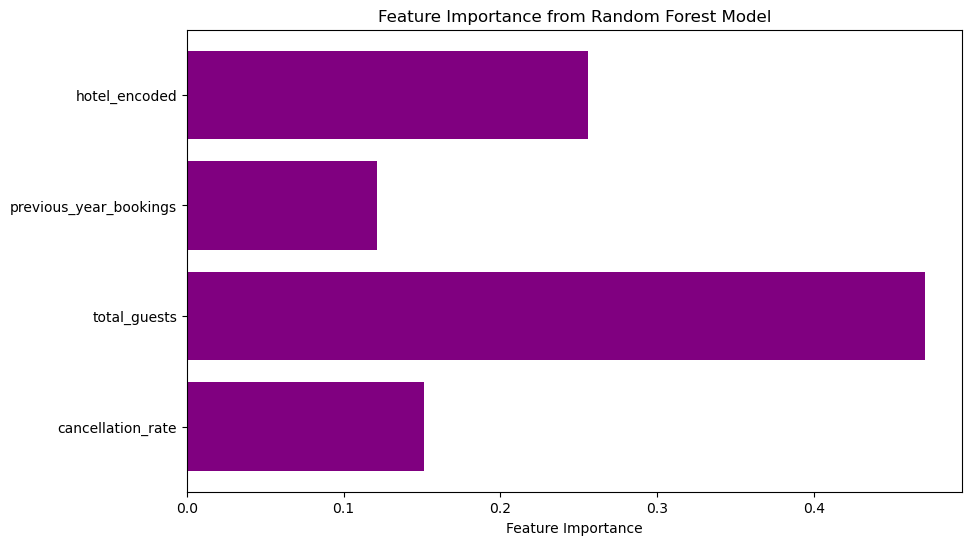

In [118]:
importances = model.feature_importances_
feature_names = x_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='purple')
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

In [119]:
yearly_guest = df.groupby(['arrival_date_year', 'hotel'])[['adults', 'children', 'babies']].sum()
yearly_guest['total_guests'] = yearly_guest.sum(axis=1)

yearly_guest = yearly_guest.reset_index()
yearly_guest['previous_year_guests'] = yearly_guest.groupby('hotel')['total_guests'].shift(1)
yearly_guest['yoy_growth'] = (yearly_guest['total_guests'] / yearly_guest['previous_year_guests']) - 1
print(yearly_guest[['arrival_date_year', 'hotel', 'total_guests', 'previous_year_guests', 'yoy_growth']])

   arrival_date_year         hotel  total_guests  previous_year_guests  \
0               2015    City Hotel       24981.0                   NaN   
1               2015  Resort Hotel       16861.0                   NaN   
2               2016    City Hotel       74577.0               24981.0   
3               2016  Resort Hotel       36758.0               16861.0   
4               2017    City Hotel       54920.0               74577.0   
5               2017  Resort Hotel       26891.0               36758.0   

   yoy_growth  
0         NaN  
1         NaN  
2    1.985349  
3    1.180060  
4   -0.263580  
5   -0.268431  


In [120]:
monthly_booking_2017 = monthly_booking[monthly_booking['arrival_date_year'] == 2017].copy()

In [121]:
monthly_booking_2018 = monthly_booking_2017.copy()
monthly_booking_2018['arrival_date_year'] = 2018
monthly_booking_2018['previous_year_bookings'] = monthly_booking_2017['num_bookings']
monthly_booking_2018['total_guests'] = monthly_booking_2017['total_guests']
monthly_booking_2018['cancellation_rate'] = monthly_booking_2017['cancellation_rate']

In [123]:
# Calculate weighted average of total guests for each hotel type
weights = {2015: 0.2, 2016: 0.3, 2017: 0.5}

def weighted_avg_guests(df, hotel_type):
    hotel_data = df[df['hotel'] == hotel_type]
    return (hotel_data['total_guests'] * hotel_data['arrival_date_year'].map(weights)).sum() / sum(weights.values())

# Apply avg to 2018 projections
resort_avg = weighted_avg_guests(yearly_guest, 'Resort Hotel')
city_avg = weighted_avg_guests(yearly_guest, 'City Hotel')

monthly_booking_2018.loc[monthly_booking_2018['hotel'] == 'Resort Hotel', 'total_guests'] = resort_avg
monthly_booking_2018.loc[monthly_booking_2018['hotel'] == 'City Hotel', 'total_guests'] = city_avg

In [124]:
features_2018 = monthly_booking_2018[['hotel_encoded', 'previous_year_bookings',
                                       'total_guests', 'cancellation_rate']]
pred_2018 = model.predict(features_2018)
monthly_booking_2018['predicted_num_bookings'] = pred_2018

result_2018 = monthly_booking_2018[['hotel', 'arrival_date_month', 'predicted_num_bookings']].sort_values(['hotel', 'arrival_date_month'])
print(result_2018.to_string(index=False))

       hotel arrival_date_month  predicted_num_bookings
  City Hotel              April                3947.810
  City Hotel             August                3737.560
  City Hotel           February                3595.695
  City Hotel            January                3514.880
  City Hotel               July                3708.200
  City Hotel               June                3947.810
  City Hotel              March                3789.270
  City Hotel                May                3947.810
Resort Hotel              April                2605.315
Resort Hotel             August                2801.825
Resort Hotel           February                2599.970
Resort Hotel            January                2512.620
Resort Hotel               July                2805.405
Resort Hotel               June                2805.405
Resort Hotel              March                2611.495
Resort Hotel                May                2605.315


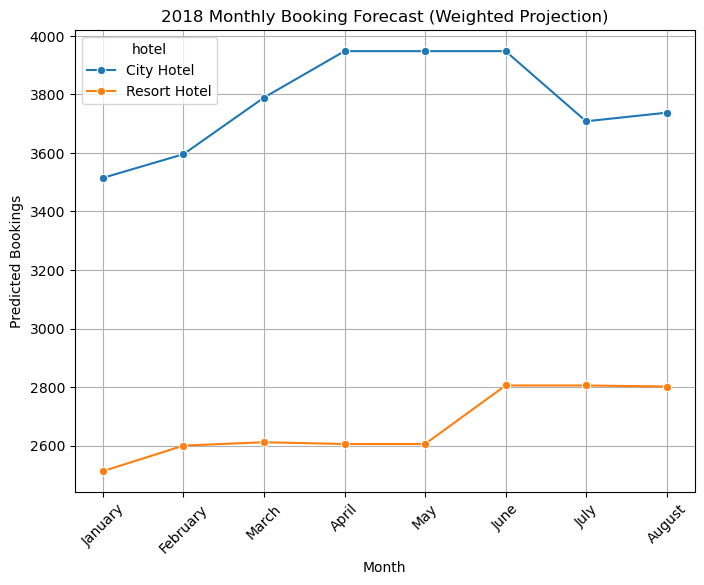

In [125]:
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=monthly_booking_2018, 
    x='arrival_date_month', 
    y='predicted_num_bookings', 
    hue='hotel',
    marker='o'
)
plt.title("2018 Monthly Booking Forecast (Weighted Projection)")
plt.xlabel("Month")
plt.ylabel("Predicted Bookings")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [126]:
#Identify the month has highest bookings for Resort Hotel
resort_df = monthly_booking_2018[monthly_booking_2018['hotel'] == 'Resort Hotel']
if not resort_df.empty:
    resort_booking = resort_df.loc[resort_df['predicted_num_bookings'].idxmax()]
    print("Month with highest bookings for Resort Hotel in 2018:")
    print(resort_booking[['hotel','arrival_date_month', 'predicted_num_bookings']])

Month with highest bookings for Resort Hotel in 2018:
hotel                     Resort Hotel
arrival_date_month                June
predicted_num_bookings        2805.405
Name: 37, dtype: object


In [127]:
city_df = monthly_booking_2018[monthly_booking_2018['hotel'] == 'City Hotel']
if not city_df.empty:
    city_booking = city_df.loc[city_df['predicted_num_bookings'].idxmax()]
    print("Month with highest bookings for City Hotel in 2018:")
    print(city_booking[['hotel','arrival_date_month', 'predicted_num_bookings']])

Month with highest bookings for City Hotel in 2018:
hotel                     City Hotel
arrival_date_month             April
predicted_num_bookings       3947.81
Name: 7, dtype: object


In [128]:
# Calculate the avg yoy growth across all years to estimate 2018 guests
avg_growth = yearly_guest['yoy_growth'].mean()
monthly_booking_2018['total_guests'] = monthly_booking_2017['total_guests'] * (1 + avg_growth)
print("Average year-over-year growth rate used for 2018 projection:",avg_growth)

Average year-over-year growth rate used for 2018 projection: 0.6583495184460986
